In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
class arguments:
    def __init__(self, cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels):
        self.cond_block = cond_block #'later' #{early,later}
        self.cond_decoding = cond_decoding #'removeevoked' #{none,removeevoked,resampled}
        self.applyBaseline_bool = applyBaseline_bool #'False'
        self.mtdt_feat = mtdt_feat
        self.occ_channels = occ_channels
        
        self.SAVE_EPOCH_ROOT = '../../../data/version5.2/preprocessed/epochs/aft_ICA_rej/'
        self.SAVE_RESULT_ROOT = '../../../results/temp_gen/blanca/'
        self.cond_filter ='none' # {none,non_symm}
        self.cond_time = 'prestim' #{prestim,poststim}
        self.subj_num = 1
        self.pre_tmin = -0.4
        self.pre_tmax = 0.05
        self.post_tmin = 0.05
        self.post_tmax = 0.45
        self.num_classes = 2
        self.normalization_type = 'normal'# {normal,lstmPaper}
        self.gen_rand_perm = 0
        self.null_max_iter = 10000
        self.loop_null_iter = 5
        self.gen_decoder_scores = 1
        self.random_state = 42 
        self.max_iter = 10000
        self.n_jobs = 1
        self.scoring = 'roc_auc'
        self.n_splits = '_3k'
        self.smooth_lvl = 55
        self.occ_channels = 'True'
        print(self.SAVE_RESULT_ROOT)




# Autocorrelation

In [3]:
def set_fonts():
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_family('serif')
    font.set_name('Calibri')
    return font

def plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax):
    
    font=set_fonts()
    fsize_t=30
    fsize_x=26
    
    # EARLY ==================================================================================
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    ax = axs[0][0]
    im = ax.imshow(avgmap_e[0,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc1', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    ax = axs[0][1]
    im = ax.imshow(avgmap_e[1,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_title('Loc2', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[1][0]
    im = ax.imshow(avgmap_e[2,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc3', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    ax = axs[1][1]
    im = ax.imshow(avgmap_e[3,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Testing Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc4', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    ax.xaxis.set_ticks_position('bottom')
    plt.colorbar(im, ax=ax)

    
    avggrp_e = np.mean(avgmap_e, axis=0)
    ax = axs[2][0]
    im = ax.imshow(avggrp_e, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    fig.delaxes(axs[2][1])
    plt.tight_layout()
    plt.suptitle( 'earlyBlocks   -    ' + title, fontproperties=font, fontsize=fsize_t, fontweight='bold',  y=1.05)
    plt.tight_layout()
    
    # LATER ==================================================================================
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    ax = axs[0][0]
    im = ax.imshow(avgmap_l[0,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc1', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[0][1]
    im = ax.imshow(avgmap_l[1,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_title('Loc2', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[1][0]
    im = ax.imshow(avgmap_l[2,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc3', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    ax = axs[1][1]
    im = ax.imshow(avgmap_l[3,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc4', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    ax.xaxis.set_ticks_position('bottom')
    plt.colorbar(im, ax=ax)

    
    avggrp_l = np.mean(avgmap_l, axis=0)
    ax = axs[2][0]
    im = ax.imshow(avggrp_l, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    fig.delaxes(axs[2][1])
    plt.tight_layout()
    plt.suptitle( 'laterBlocks   -    ' + title, fontproperties=font, fontsize=fsize_t, fontweight='bold',  y=1.05)
    plt.tight_layout()


    plt.show()

In [26]:

def set_fonts():
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_family('serif')
    font.set_name('Calibri')
    return font

def plot_autocorr_avgGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    font=set_fonts()
    fsize_t=20
    fsize_x=26
    fig, axs = plt.subplots(2, 2, figsize=(15,15))
    fig.suptitle(title, fontproperties=font, fontsize=fsize_t, fontweight='bold')#,  y=1.05)    
    # EARLY ==================================================================================
    avggrp_e = np.mean(avgmap_e, axis=0)
    ax = axs[0][0]
    im = ax.imshow(avggrp_e, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
#     ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average - Early Blocks', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    # LATER ==================================================================================
    avggrp_l = np.mean(avgmap_l, axis=0)
    ax = axs[0][1]
    im = ax.imshow(avggrp_l, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
#     ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average - Later Blocks', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    # DIFFERENCE ==================================================================================
    avggrp_d = avggrp_l - avggrp_e
    ax = axs[1][0]
    im = ax.imshow(avggrp_d, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Difference (Later - Early)', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    # Plot settings ================================================================================
    fig.delaxes(axs[1][1])
    


    
    for ii in range(2):
        for jj in range(2):
            axs[ii][jj].axvline(0, color='k')
            axs[ii][jj].axhline(0, color='k')
            axs[ii][jj].xaxis.set_ticks_position('bottom')
            axs[ii][jj].xaxis.set_tick_params(labelsize=15)
            axs[ii][jj].yaxis.set_tick_params(labelsize=15)
    
    ax=axs[1][0]
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')


    plt.show()

In [5]:
def combine_subj_ERPs(args, subj_p1, subj_p2):

    ERP_p1=[]
    ERP_p2=[]
    ind_Grps_dt=4
    
    for subj_id in subj_p1:
        main_ptrn = 1
        args.subj_num = subj_id
        fn_str_sbj='%sBlocks_%sFilter_PrePost_decod%s_bsline%s_%sChann_%s_Subj_%s' \
                    %(args.cond_block, args.cond_filter, \
                      args.cond_decoding, args.applyBaseline_bool, \
                      args.occ_channels, args.mtdt_feat, args.subj_num)

        fn_str = args.SAVE_RESULT_ROOT + 'ERP_P%s_' %(main_ptrn) + fn_str_sbj
        with open(fn_str, 'rb') as f:
            erps = pickle.load(f)
            
        erps_avgG1 = np.mean(erps[ind_Grps_dt].copy(), axis=1)
        ERP_p1.append(erps_avgG1.copy())


    for subj_id in subj_p2:
        main_ptrn = 2
        args.subj_num = subj_id
        fn_str_sbj='%sBlocks_%sFilter_PrePost_decod%s_bsline%s_%sChann_%s_Subj_%s' \
                    %(args.cond_block, args.cond_filter, \
                      args.cond_decoding, args.applyBaseline_bool, \
                      args.occ_channels, args.mtdt_feat, args.subj_num)

        fn_str = args.SAVE_RESULT_ROOT + 'ERP_P%s_' %(main_ptrn) + fn_str_sbj
        with open(fn_str, 'rb') as f:
            erps = pickle.load(f)

        erps_avgG2 = np.mean(erps[ind_Grps_dt].copy(), axis=1)
        ERP_p2.append(erps_avgG2.copy())
        
    print('p1 subjects:',np.asarray(ERP_p1).shape)
    print('p2 subjects', np.asarray(ERP_p2).shape)
    p1=np.asarray(ERP_p1)
    p2=np.asarray(ERP_p2)
    p=np.concatenate((p1, p2), axis=0)
    subset = erps[0].copy()
    
    return p, subset

In [6]:
"""
Reading and preparing epoch data to create each 4 grous and 2 pattern
"""
import mne
import numpy as np
from scipy.signal import savgol_filter

def read_prep_epochs(args):


    if args.applyBaseline_bool:
        filename_epoch = args.SAVE_EPOCH_ROOT + \
                         'epochs_sec_applyBaseline_subj%s-afterRejICA-epo.fif' \
                          %args.subj_num
    else:
        filename_epoch = args.SAVE_EPOCH_ROOT + \
                         'epochs_sec_subj%s-afterRejICA-epo.fif' \
                         %args.subj_num
    epochs_orig = mne.read_epochs(filename_epoch, proj=True, preload=True,
                                  verbose=None)
    epochs = epochs_orig.copy()
    subset = epochs['pred']['non'].copy()
    subset = subset.pick_types(eeg=True)
    if (args.cond_decoding=='removeevoked'):
        # REMOVE EVOKED RESP.
        subset.subtract_evoked()    # remove evoked response
    elif (args.cond_decoding=='resampled'):
        # RESAMPLE
        subset = subset.resample(args.n_resampling, npad='auto')
    else:
        pass
    ##==========================================================================
    # Select EEG channels of the back
    if args.occ_channels:
        picks_back_brain = ['E56', 'E63', 'E68', 'E73', 'E81', 'E88', 'E94', 'E99', 'E107',
        'E57', 'E64', 'E69', 'E74', 'E82', 'E89', 'E95', 'E100',
        'E50', 'E58', 'E65', 'E70', 'E75', 'E83', 'E90', 'E96', 'E101',
        'E51', 'E59', 'E66', 'E71', 'E76', 'E84', 'E91', 'E97',
        'E52', 'E60', 'E67', 'E72', 'E77', 'E85', 'E92'
        'E53', 'E61', 'E62', 'E78','E86'
        ]
        subset = subset.pick_types(eeg=True, selection=picks_back_brain)
    ##==========================================================================
    if subset['Block==7'].metadata.Ptrn_Type.values.shape[0]>0:
       main_ptrn = subset['Block==7'].metadata.Ptrn_Type.values[0]
    else:
       main_ptrn = subset['Block==8'].metadata.Ptrn_Type.values[0]
    ##==========================================================================
    if args.cond_block=='early': #block 3-6
        subset = subset['Block<7'].copy()
        subset = subset['Block>2'].copy()
    elif args.cond_block=='later':#block 7-10
        subset = subset['Block<11'].copy()
        subset = subset['Block>6'].copy()
    elif args.cond_block=='diff':
        se = subset['Block<7'].copy() # early blocks
        se = se['Block>2'].copy()
        print('earlier blocks shape:\n')
        print(se._data.shape)
        sl= subset['Block<11'].copy() # later blocks
        sl = sl['Block>6'].copy()
        print('later blocks shape:\n')
        print(sl._data.shape)
        subset._data=sl._data-se._data

    ##==========================================================================
    subset= subset.crop(tmin=-0.45, tmax=0.45)
    # if (args.cond_time=='prestim'):
    #     subset= subset.crop(tmin=-0.4, tmax=0.05)
    # if (args.cond_time=='poststim'):
    #     subset= subset.crop(tmin=0.05, tmax=0.45)
    # print('Shape of data after crop time is\n :')
    print(subset._data.shape)
    ##==========================================================================
    # Group data based on the previous trial
     # Group data based on the current main loc
    Grp1 = subset['%s==1' %(args.mtdt_feat)].copy()
    Grp2 = subset['%s==2' %(args.mtdt_feat)].copy()
    Grp3 = subset['%s==3' %(args.mtdt_feat)].copy()
    Grp4 = subset['%s==4' %(args.mtdt_feat)].copy()

    # Grp1 = subset['Trgt_Loc_prev==1'].copy()
    # Grp2 = subset['Trgt_Loc_prev==2'].copy()
    # Grp3 = subset['Trgt_Loc_prev==3'].copy()
    # Grp4 = subset['Trgt_Loc_prev==4'].copy()
    if main_ptrn==1:
        Grp1 = Grp1['Trgt_Loc_main!=4'].copy()
        Grp2 = Grp2['Trgt_Loc_main!=1'].copy()
        Grp3 = Grp3['Trgt_Loc_main!=2'].copy()
        Grp4 = Grp4['Trgt_Loc_main!=3'].copy()
    ##==========================================================================
    frequencies = np.arange(3, 13, 2)
    if args.cond_decoding=='non_symm':
        Grp1 = apply_nonSymm_filter(Grp1, frequencies)
        Grp2 = apply_nonSymm_filter(Grp2, frequencies)
        Grp3 = apply_nonSymm_filter(Grp3, frequencies)
        Grp4 = apply_nonSymm_filter(Grp4, frequencies)
    ##==========================================================================
    inds = np.zeros((4,1))
    for iind in range(4):
        inds[iind] = subset['%s==%s' %(args.mtdt_feat, iind+1)]._data.shape[0]

    ind1=int(min(inds))
    ind2=subset['%s==1' %(args.mtdt_feat)]._data.shape[1]
    ind3=subset['%s==1' %(args.mtdt_feat)]._data.shape[2]
    print('minimum ind across four groups: ', ind1)
    ##==========================================================================
    # Equalize the number of each group
    # Grp1._data = Grp1._data[:ind1,:,:]
    # Grp2._data = Grp2._data[:ind1,:,:]
    # Grp3._data = Grp3._data[:ind1,:,:]
    # Grp4._data = Grp4._data[:ind1,:,:]
    ##==========================================================================
    print('the pattern for this subj is :=====================================')
    print(main_ptrn)
    print('          ')
    print('===================================================================')
    ##==========================================================================
    # Normalizing the data for each subject
    if args.normalization_type=='normal':
        Grp1._data = (Grp1._data - np.mean(Grp1._data)) / np.std(Grp1._data)
        Grp2._data = (Grp2._data - np.mean(Grp2._data)) / np.std(Grp2._data)
        Grp3._data = (Grp3._data - np.mean(Grp3._data)) / np.std(Grp3._data)
        Grp4._data = (Grp4._data - np.mean(Grp4._data)) / np.std(Grp4._data)
    elif args.normalization_type=='lstmPaper':
        Grp1._data = (2 * (Grp1._data - np.min(Grp1._data))) \
                        / (np.max(Grp1._data) - np.min(Grp1._data) - 1)
        Grp2._data = (2 * (Grp2._data - np.min(Grp2._data))) \
                        / (np.max(Grp2._data) - np.min(Grp2._data) - 1)
        Grp3._data = (2 * (Grp3._data - np.min(Grp3._data))) \
                        / (np.max(Grp3._data) - np.min(Grp3._data) - 1)
        Grp4._data = (2 * (Grp4._data - np.min(Grp4._data))) \
                        / (np.max(Grp4._data) - np.min(Grp4._data) - 1)
    ##==========================================================================
    Grps_dt = np.zeros((4, ind1, ind2, ind3))
    Grps_dt[0,:,:,:]=Grp1._data[:ind1,:,:]
    Grps_dt[1,:,:,:]=Grp2._data[:ind1,:,:]
    Grps_dt[2,:,:,:]=Grp3._data[:ind1,:,:]
    Grps_dt[3,:,:,:]=Grp4._data[:ind1,:,:]
    Grps_avg = np.mean(Grps_dt, axis=1)
    ##==========================================================================
    # smoothing data
    evk_data = np.mean(Grps_avg, axis=1)
    smooth_evk = np.zeros((5, evk_data.shape[1]))
    smooth_evk[0,:] = savgol_filter(evk_data[0,:], args.smooth_lvl, 3)
    smooth_evk[1,:] = savgol_filter(evk_data[1,:], args.smooth_lvl, 3)
    smooth_evk[2,:] = savgol_filter(evk_data[2,:], args.smooth_lvl, 3)
    smooth_evk[3,:] = savgol_filter(evk_data[3,:], args.smooth_lvl, 3)
    smooth_evk[4,:] = savgol_filter(np.mean(evk_data, 0), args.smooth_lvl, 3)
    ##==========================================================================
    # return Grp1, Grp2, Grp3, Grp4, main_ptrn
    return Grp1, Grp2, Grp3, Grp4, Grps_dt, Grps_avg, smooth_evk, main_ptrn



In [7]:
selected_subj_P1 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 15, 16, \
                    42, 43, 44, 45, 47, 48, 51, 52, 53, \
                    55, 56, 57, 58, 59, 60, 61, 62, 63, 64, \
                    66, 67, 68, 69, 71, 72, 73, 74]
selected_subj_P2 = [18, 19, 20, 21, 23, 24, 26, 28, 29, 30, \
                   31, 32, 33, 34, 35, 36, 38, 39]

In [8]:
args = arguments('early', 'removeevoked', 'False', 'Trgt_Loc_main', 'False' )
Grp1, Grp2, Grp3, Grp4, Grps_dt, Grps_avg, smooth_evk, main_ptrn = read_prep_epochs(args)
subset = Grp1.copy()

../../../results/temp_gen/blanca/
Reading ../../../data/version5.2/preprocessed/epochs/aft_ICA_rej/epochs_sec_applyBaseline_subj1-afterRejICA-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
    Found the data of interest:
        t =    -400.00 ...    5000.00 ms
        0 CTF compensation matrices available
1197 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Subtracting Evoked from Epochs
[done]


<ipython-input-6-c020f69931f8>:67: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  subset= subset.crop(tmin=-0.45, tmax=0.45)


(352, 44, 213)
minimum ind across four groups:  84
the pattern for this subj is :=====================================
1
          


In [63]:
args = arguments('later', 'removeevoked', 'False', 'Trgt_Loc_main', 'False' )
Grp1_l, Grp2_l, Grp3_l, Grp4_l, Grps_dt_l, Grps_avg_l, smooth_evk_l, main_ptrn_l = read_prep_epochs(args)

../../../results/temp_gen/blanca/
Reading ../../../data/version5.2/preprocessed/epochs/aft_ICA_rej/epochs_sec_applyBaseline_subj1-afterRejICA-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
    Found the data of interest:
        t =    -400.00 ...    5000.00 ms
        0 CTF compensation matrices available
1197 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Subtracting Evoked from Epochs
[done]


<ipython-input-6-c020f69931f8>:67: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  subset= subset.crop(tmin=-0.45, tmax=0.45)


(357, 44, 213)
minimum ind across four groups:  87
the pattern for this subj is :=====================================
1
          


108    0.66154
113    0.80991
116    0.67184
121    0.72020
124    0.61263
132    0.65463
137    0.50357
140    0.56478
145    0.62587
148    0.64582
153    0.50059
161    0.82211
164    0.66073
169    1.10770
172    0.82109
180    0.65918
185    0.54922
193    0.41352
196    0.52534
201    0.52147
204    0.85683
209    0.47055
Name: RT, dtype: float64
(20,)


In [88]:
def calc_block_RTs(data_e, data_l):
    B3  = np.mean(data_e.metadata[data_e.metadata.Block==3].RT)
    B4  = np.mean(data_e.metadata[data_e.metadata.Block==4].RT)
    B5  = np.mean(data_e.metadata[data_e.metadata.Block==5].RT)
    B6  = np.mean(data_e.metadata[data_e.metadata.Block==6].RT)
    B7  = np.mean(data_l.metadata[data_l.metadata.Block==7].RT)
    B8  = np.mean(data_l.metadata[data_l.metadata.Block==8].RT)
    B9  = np.mean(data_l.metadata[data_l.metadata.Block==9].RT)
    B10 = np.mean(data_l.metadata[data_l.metadata.Block==10].RT)
    
    blocks_RTs = [B3, B4, B5, B6, B7, B8, B9, B10]

    return blocks_RTs

def combine_subj_RTs(args, subj_ids):
    tot_num_blocks = 8
    RTs_Subjs = np.zeros([len(subj_ids), 4, tot_num_blocks] )
    for subj_id in range(len(subj_ids)):
        args.cond_block = 'early'
        [Grp1e, Grp2e, Grp3e, Grp4e, Grps_dt, Grps_avg, smooth_evk, main_ptrn] = \
        read_prep_epochs(args)

        args.cond_block = 'later'
        [Grp1l, Grp2l, Grp3l, Grp4l, Grps_dt, Grps_avg, smooth_evk, main_ptrn] = \
        read_prep_epochs(args)
        
        RTs_Subjs[subj_id, 0, :] = calc_block_RTs(Grp1e, Grp1l)
        RTs_Subjs[subj_id, 1, :] = calc_block_RTs(Grp2e, Grp2l)
        RTs_Subjs[subj_id, 2, :] = calc_block_RTs(Grp3e, Grp3l)
        RTs_Subjs[subj_id, 3, :] = calc_block_RTs(Grp4e, Grp4l)
        

    return RTs_Subjs

In [89]:
subset

<EpochsFIF  |   93 events (all good), -0.4 - 0.448 sec, baseline [-0.4, 0], ~6.7 MB, data loaded, with metadata,
 'pred/left/non': 93>

In [90]:
subj_ids = [1, 2]
RTs_Subjs = combine_subj_RTs(args, subj_ids)

Reading ../../../data/version5.2/preprocessed/epochs/aft_ICA_rej/epochs_sec_applyBaseline_subj1-afterRejICA-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
    Found the data of interest:
        t =    -400.00 ...    5000.00 ms
        0 CTF compensation matrices available
1197 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Subtracting Evoked from Epochs
[done]


<ipython-input-6-c020f69931f8>:67: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  subset= subset.crop(tmin=-0.45, tmax=0.45)


(352, 44, 213)
minimum ind across four groups:  84
the pattern for this subj is :=====================================
1
          
Reading ../../../data/version5.2/preprocessed/epochs/aft_ICA_rej/epochs_sec_applyBaseline_subj1-afterRejICA-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
    Found the data of interest:
        t =    -400.00 ...    5000.00 ms
        0 CTF compensation matrices available
1197 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Subtracting Evoked from Epochs
[done]


<ipython-input-6-c020f69931f8>:67: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  subset= subset.crop(tmin=-0.45, tmax=0.45)


(357, 44, 213)
minimum ind across four groups:  87
the pattern for this subj is :=====================================
1
          
Reading ../../../data/version5.2/preprocessed/epochs/aft_ICA_rej/epochs_sec_applyBaseline_subj1-afterRejICA-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
    Found the data of interest:
        t =    -400.00 ...    5000.00 ms
        0 CTF compensation matrices available
1197 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Subtracting Evoked from Epochs
[done]


<ipython-input-6-c020f69931f8>:67: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  subset= subset.crop(tmin=-0.45, tmax=0.45)


(352, 44, 213)
minimum ind across four groups:  84
the pattern for this subj is :=====================================
1
          
Reading ../../../data/version5.2/preprocessed/epochs/aft_ICA_rej/epochs_sec_applyBaseline_subj1-afterRejICA-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
    Found the data of interest:
        t =    -400.00 ...    5000.00 ms
        0 CTF compensation matrices available
1197 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Subtracting Evoked from Epochs
[done]


<ipython-input-6-c020f69931f8>:67: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  subset= subset.crop(tmin=-0.45, tmax=0.45)


(357, 44, 213)
minimum ind across four groups:  87
the pattern for this subj is :=====================================
1
          


In [91]:
RTs_Subjs.shape

(2, 4, 8)

In [93]:
subj_indx = [ 1,  2,  3,  4,  5,  7,  8,  9, 10, 12, 15, 16, 18, 19, 20, 21,\
              23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38,\
              39, 43, 44, 45, 47, 48, 51, 52, 56, 57, 58, 59,\
              60, 61, 63, 64, 66, 67, 68, 69, 71, 72, 73]

# subj_indx = [ 1,  2,  3,  4,  5,  7,  8,  9, 10, 12, 15, 16, 18, 19, 20, 21,\
#               23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38,\
#               39, 42, 43, 44, 45, 46, 47, 48, 51, 52, 53, 55, 56, 57, 58, 59,\
#               60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74]
len(subj_indx)

59

# Conditions

../../../results/temp_gen/blanca/
p1 subjects: (33, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p early all subjects: (51, 4, 44, 213)
../../../results/temp_gen/blanca/
p1 subjects: (33, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p later all subjects: (51, 4, 44, 213)
p diff all subjects: (51, 4, 44, 213)


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


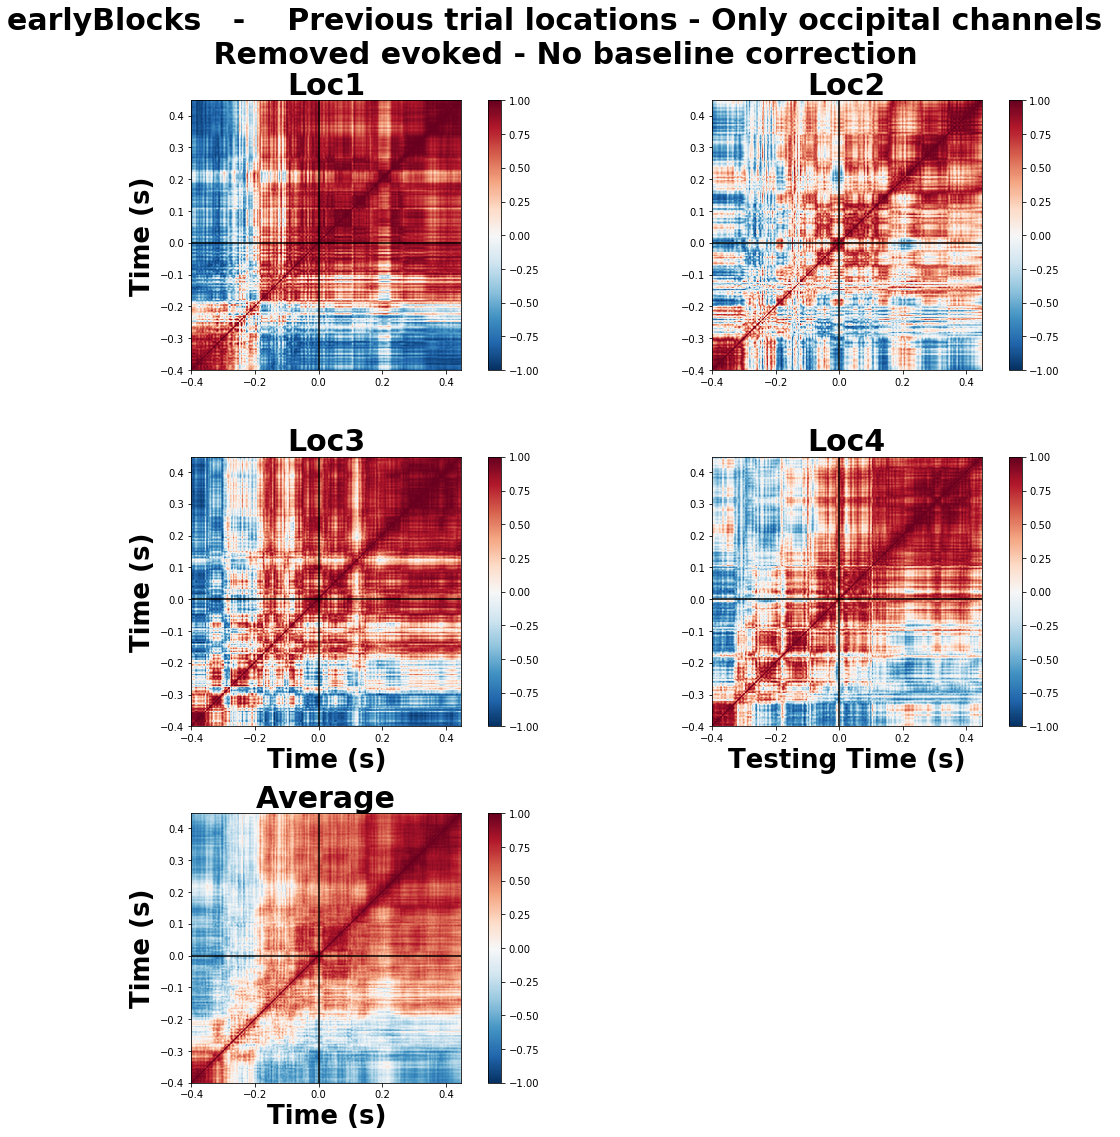

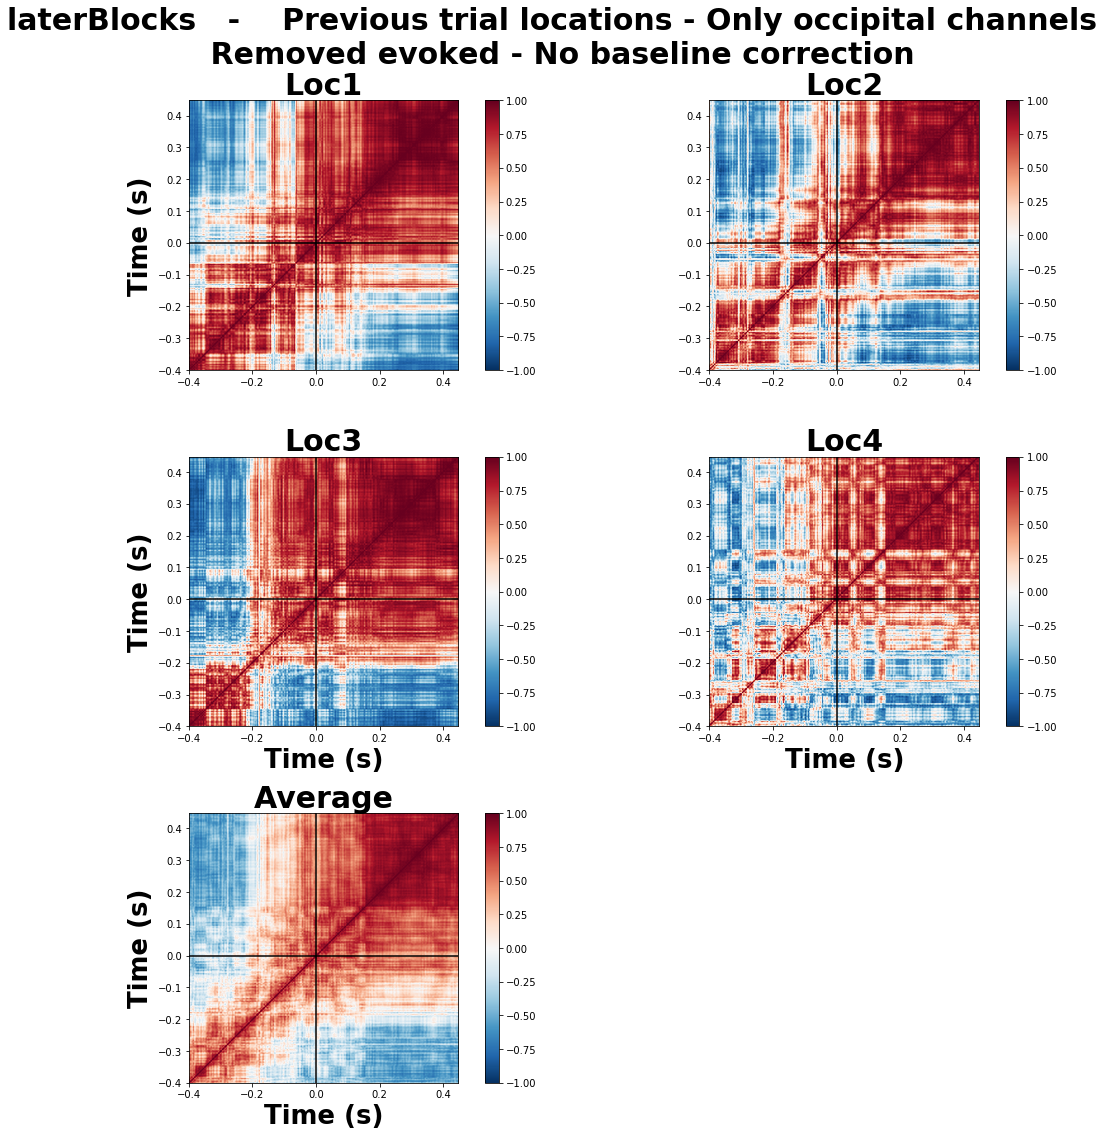

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


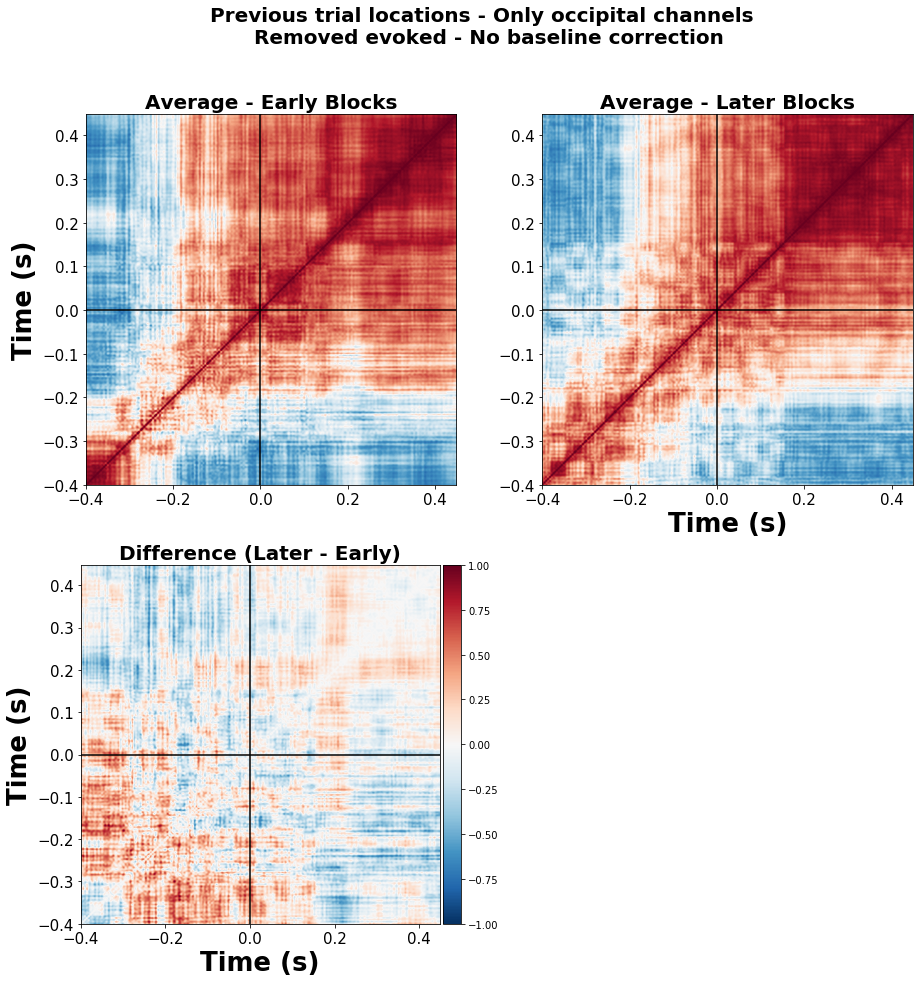

In [10]:
subj_p1 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 16, \
           43, 44, 45, 47, 48, 51, 52, \
           56, 57, 58, 59, 60, 61, 63, 64, \
           66, 67, 68, 69, 71, 72, 73]
subj_p2 = [18, 19, 20, 21, 23, 24, 26, 28, 29, 30, \
           31, 32, 33, 34, 35, 36, 38, 39]

# early ------------- #
# cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels)
args = arguments('early', 'removeevoked', 'False', 'Trgt_Loc_prev', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_e_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p early all subjects:',act_e_occ.shape)

# late ------------- #
args = arguments('later', 'removeevoked', 'False', 'Trgt_Loc_prev', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_l_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p later all subjects:',act_l_occ.shape)

# diff ------------- #
act_d_occ = act_l_occ.copy() - act_e_occ.copy()
print('p diff all subjects:',act_d_occ.shape)

evk_data_e_occ = np.mean(act_e_occ, axis=0)
evk_data_l_occ = np.mean(act_l_occ, axis=0)
evk_data_d_occ = np.mean(act_d_occ, axis=0)

diff_SxCxT = np.mean(act_d_occ.copy(), axis=1)
diff_SxTxC = diff_SxCxT.reshape(diff_SxCxT.shape[0], diff_SxCxT.shape[2], diff_SxCxT.shape[1])
diff_SxT = np.mean(diff_SxCxT.copy(), axis=1)
diff_T = np.mean(diff_SxT, axis=0)

num_tot_subjects = diff_SxCxT.shape[0]
#----------------------------------------------------------------------------------------------------------
from sklearn.metrics.pairwise import cosine_similarity
# avg = 

mapr_e = np.zeros((4, evk_data_e_occ.shape[2], evk_data_e_occ.shape[2]))
mapr_l = np.zeros((4, evk_data_l_occ.shape[2], evk_data_l_occ.shape[2]))

mapr_e[0,:,:] = cosine_similarity(X=evk_data_e_occ[0,:,:].copy().T, Y=None).T
mapr_e[1,:,:] = cosine_similarity(X=evk_data_e_occ[1,:,:].copy().T, Y=None).T
mapr_e[2,:,:] = cosine_similarity(X=evk_data_e_occ[2,:,:].copy().T, Y=None).T
mapr_e[3,:,:] = cosine_similarity(X=evk_data_e_occ[3,:,:].copy().T, Y=None).T

mapr_l[0,:,:] = cosine_similarity(X=evk_data_l_occ[0,:,:].copy().T, Y=None).T
mapr_l[1,:,:] = cosine_similarity(X=evk_data_l_occ[1,:,:].copy().T, Y=None).T
mapr_l[2,:,:] = cosine_similarity(X=evk_data_l_occ[2,:,:].copy().T, Y=None).T
mapr_l[3,:,:] = cosine_similarity(X=evk_data_l_occ[3,:,:].copy().T, Y=None).T

mapr_d = mapr_l - mapr_e
#----------------------------------------------------------------------------------------------------------
avgmap_e = mapr_e.copy()#np.mean(mapr_e, axis=0)
avgmap_l = mapr_l.copy()#np.mean(mapr_l, axis=0)
avgmap_d = mapr_d.copy()#np.mean(mapr_d, axis=0)
#----------------------------------------------------------------------------------------------------------
#  plot ------------- #
vmin=-1
vmax=1
title = 'Previous trial locations - Only occipital channels \n Removed evoked - No baseline correction'
plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)


#----------------------------------------------------------------------------------------------------------
#  plot ------------- #
vmin=-1
vmax=1
title = 'Previous trial locations - Only occipital channels \n Removed evoked - No baseline correction'
plot_autocorr_avgGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)

../../../results/temp_gen/blanca/
p1 subjects: (33, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p early all subjects: (51, 4, 44, 213)
../../../results/temp_gen/blanca/
p1 subjects: (33, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p later all subjects: (51, 4, 44, 213)
p diff all subjects: (51, 4, 44, 213)


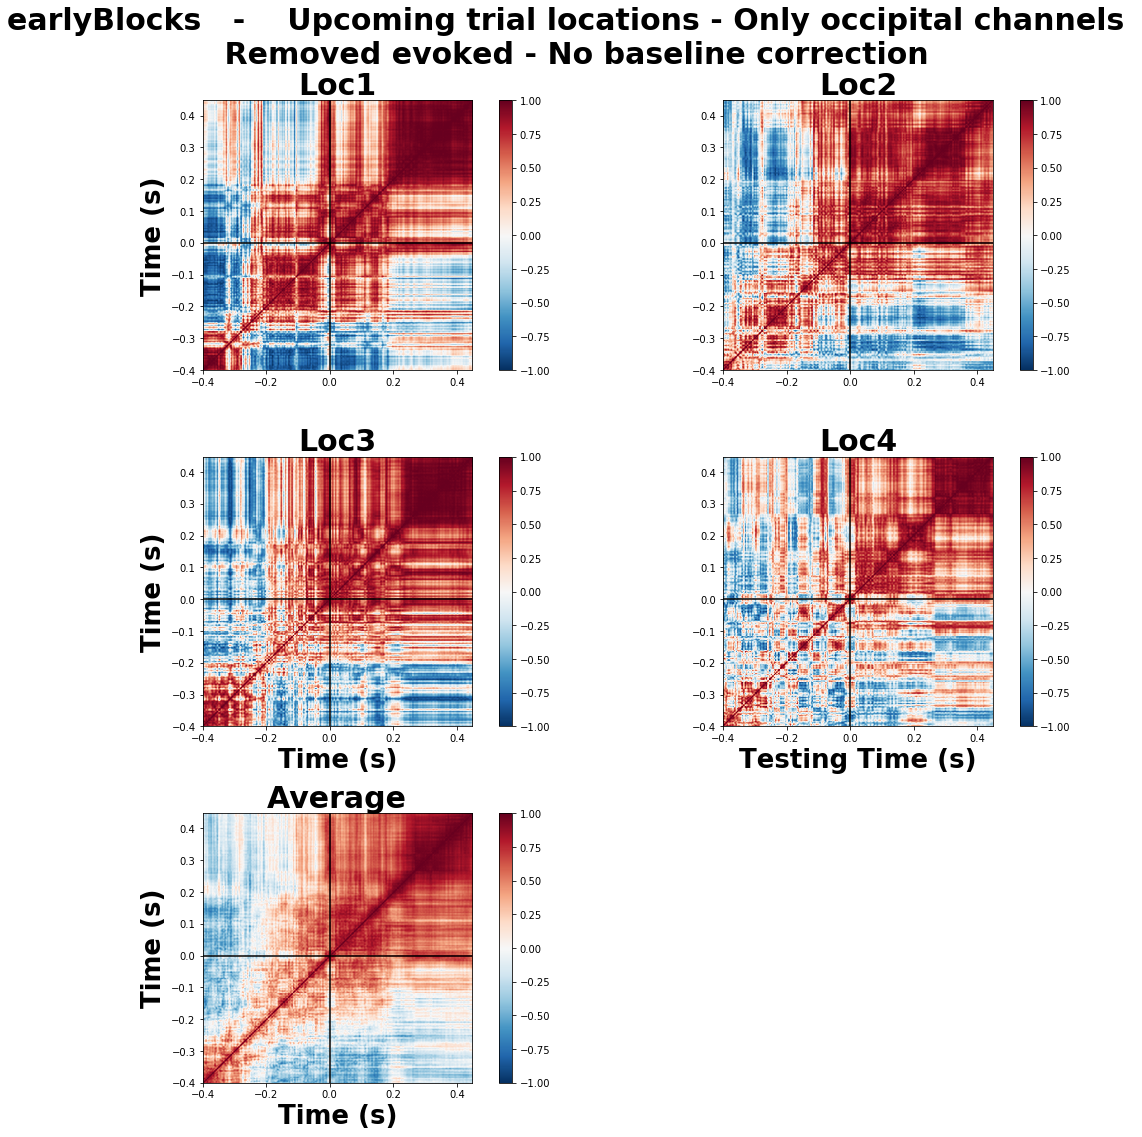

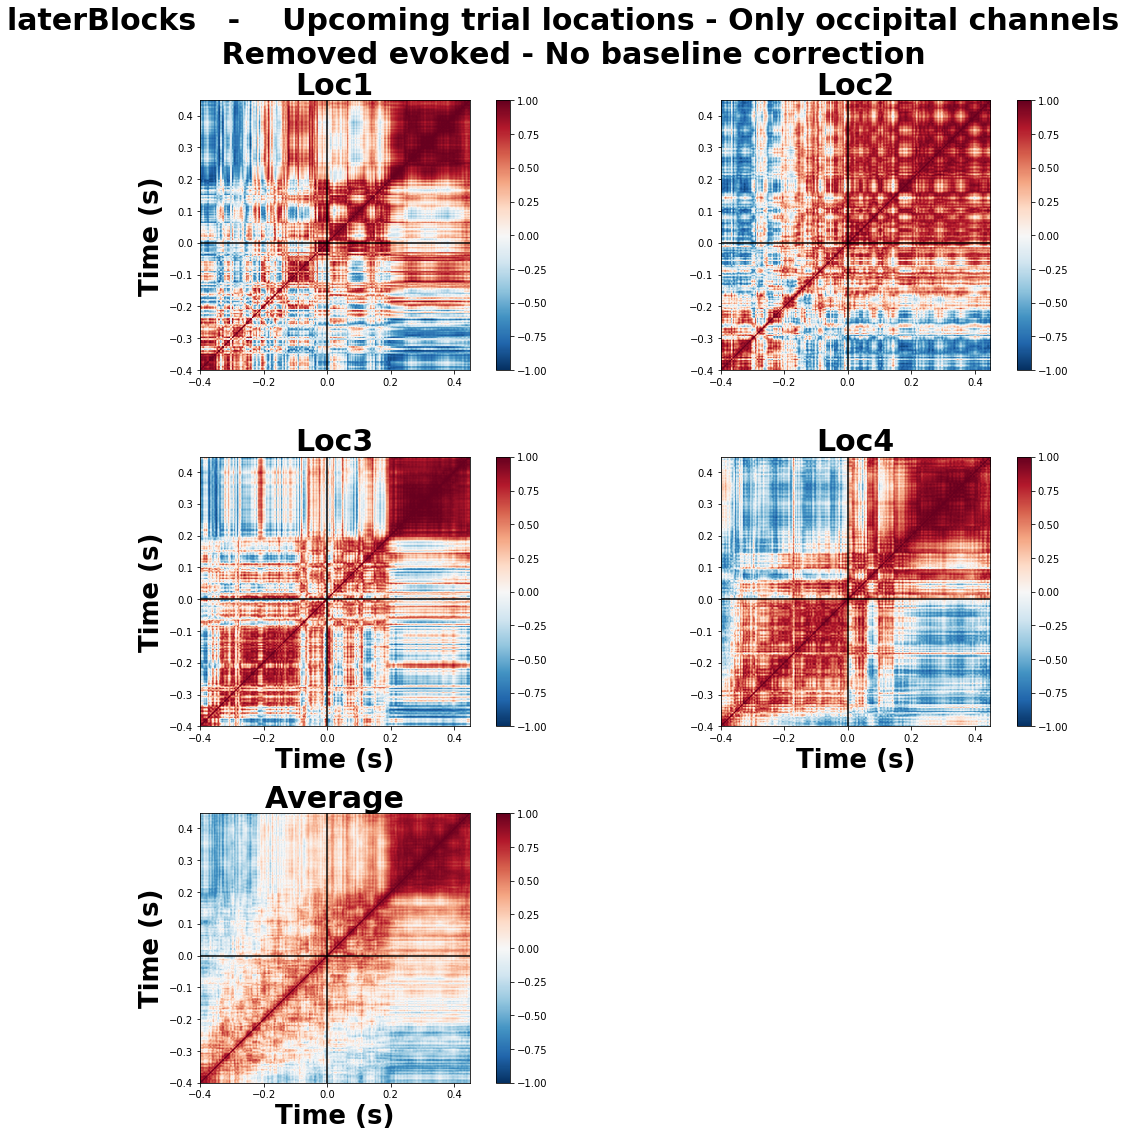

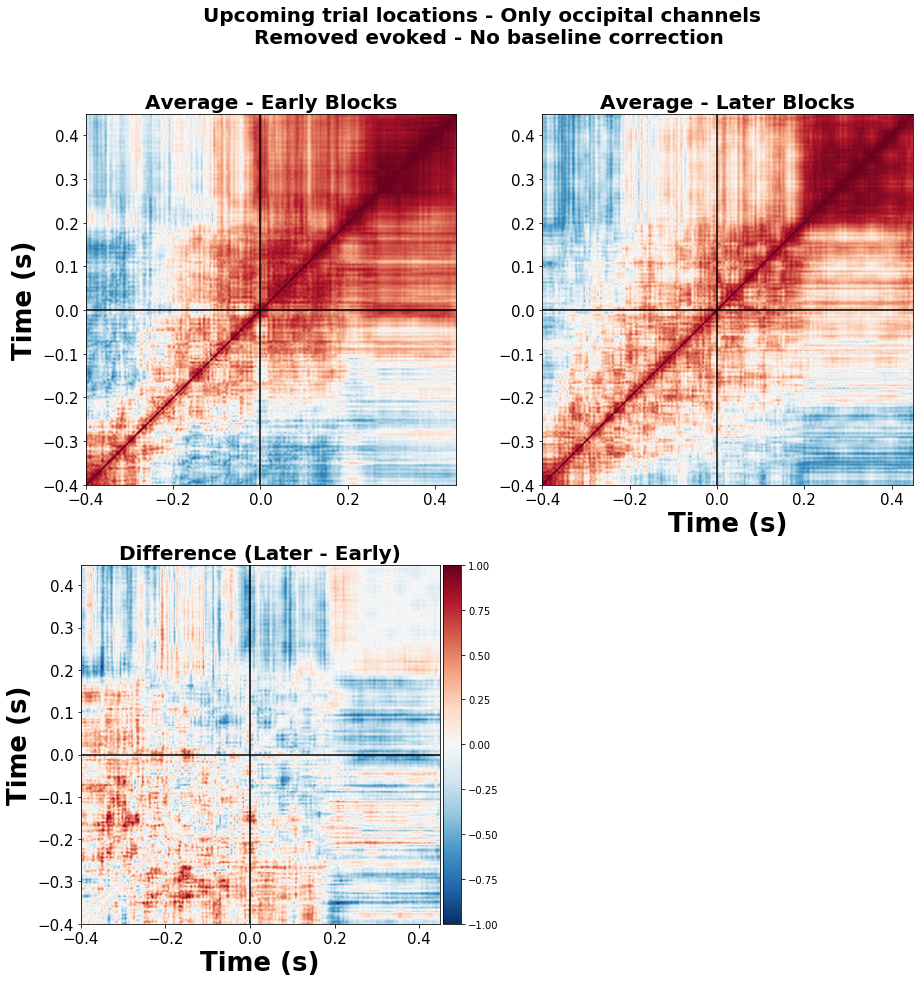

In [33]:
subj_p1 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 16, \
           43, 44, 45, 47, 48, 51, 52, \
           56, 57, 58, 59, 60, 61, 63, 64, \
           66, 67, 68, 69, 71, 72, 73]
subj_p2 = [18, 19, 20, 21, 23, 24, 26, 28, 29, 30, \
           31, 32, 33, 34, 35, 36, 38, 39]

# early ------------- #
# cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels)
args = arguments('early', 'removeevoked', 'False', 'Trgt_Loc_main', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_e_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p early all subjects:',act_e_occ.shape)

# late ------------- #
args = arguments('later', 'removeevoked', 'False', 'Trgt_Loc_main', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_l_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p later all subjects:',act_l_occ.shape)

# diff ------------- #
act_d_occ = act_l_occ.copy() - act_e_occ.copy()
print('p diff all subjects:',act_d_occ.shape)

evk_data_e_occ = np.mean(act_e_occ, axis=0)
evk_data_l_occ = np.mean(act_l_occ, axis=0)
evk_data_d_occ = np.mean(act_d_occ, axis=0)

diff_SxCxT = np.mean(act_d_occ.copy(), axis=1)
diff_SxTxC = diff_SxCxT.reshape(diff_SxCxT.shape[0], diff_SxCxT.shape[2], diff_SxCxT.shape[1])
diff_SxT = np.mean(diff_SxCxT.copy(), axis=1)
diff_T = np.mean(diff_SxT, axis=0)

num_tot_subjects = diff_SxCxT.shape[0]
#----------------------------------------------------------------------------------------------------------
from sklearn.metrics.pairwise import cosine_similarity
# avg = 

mapr_e = np.zeros((4, evk_data_e_occ.shape[2], evk_data_e_occ.shape[2]))
mapr_l = np.zeros((4, evk_data_l_occ.shape[2], evk_data_l_occ.shape[2]))

mapr_e[0,:,:] = cosine_similarity(X=evk_data_e_occ[0,:,:].copy().T, Y=None).T
mapr_e[1,:,:] = cosine_similarity(X=evk_data_e_occ[1,:,:].copy().T, Y=None).T
mapr_e[2,:,:] = cosine_similarity(X=evk_data_e_occ[2,:,:].copy().T, Y=None).T
mapr_e[3,:,:] = cosine_similarity(X=evk_data_e_occ[3,:,:].copy().T, Y=None).T

mapr_l[0,:,:] = cosine_similarity(X=evk_data_l_occ[0,:,:].copy().T, Y=None).T
mapr_l[1,:,:] = cosine_similarity(X=evk_data_l_occ[1,:,:].copy().T, Y=None).T
mapr_l[2,:,:] = cosine_similarity(X=evk_data_l_occ[2,:,:].copy().T, Y=None).T
mapr_l[3,:,:] = cosine_similarity(X=evk_data_l_occ[3,:,:].copy().T, Y=None).T

mapr_d = mapr_l - mapr_e
#----------------------------------------------------------------------------------------------------------
avgmap_e = mapr_e.copy()#np.mean(mapr_e, axis=0)
avgmap_l = mapr_l.copy()#np.mean(mapr_l, axis=0)
avgmap_d = mapr_d.copy()#np.mean(mapr_d, axis=0)
#----------------------------------------------------------------------------------------------------------
#  plot ------------- #
vmin=-1
vmax=1
title = 'Upcoming trial locations - Only occipital channels \n Removed evoked - No baseline correction'
plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)


#----------------------------------------------------------------------------------------------------------
#  plot ------------- #
vmin=-1
vmax=1
title = 'Upcoming trial locations - Only occipital channels \n Removed evoked - No baseline correction'
plot_autocorr_avgGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)

../../../results/temp_gen/blanca/
p1 subjects: (33, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p early all subjects: (51, 4, 44, 213)
../../../results/temp_gen/blanca/
p1 subjects: (33, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p later all subjects: (51, 4, 44, 213)
p diff all subjects: (51, 4, 44, 213)


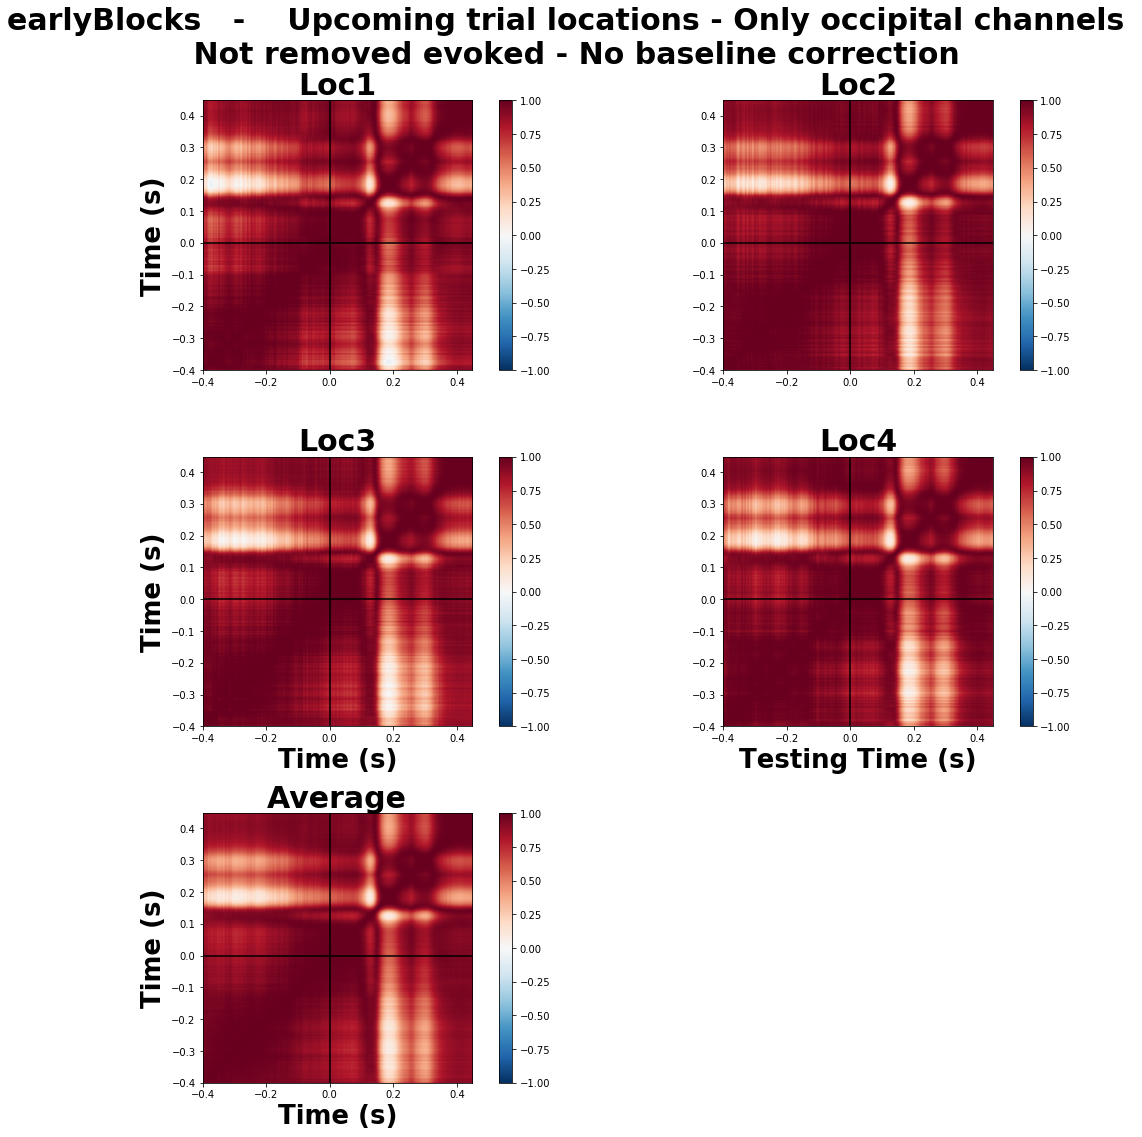

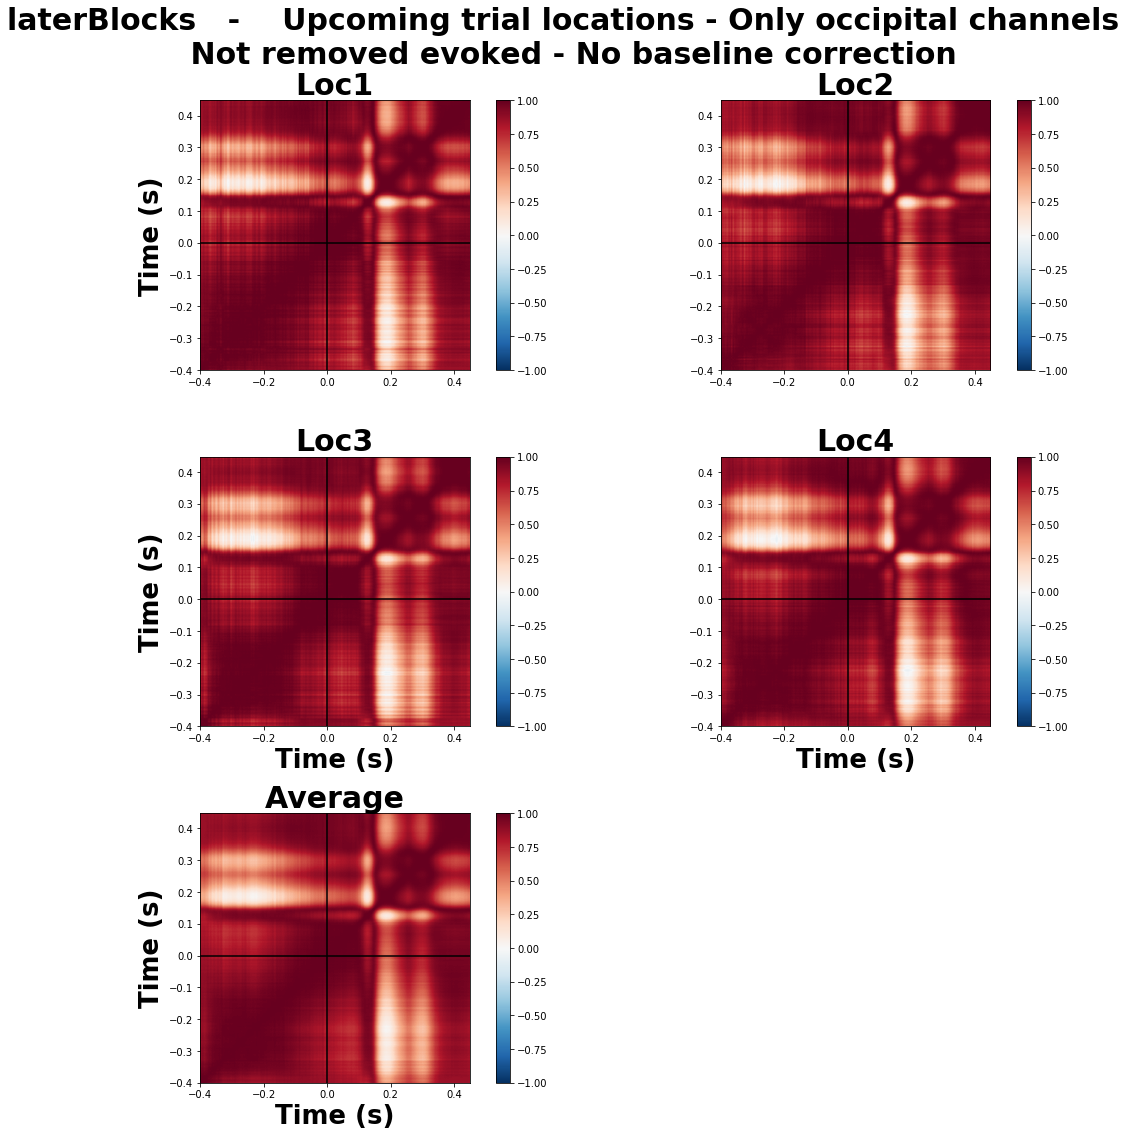

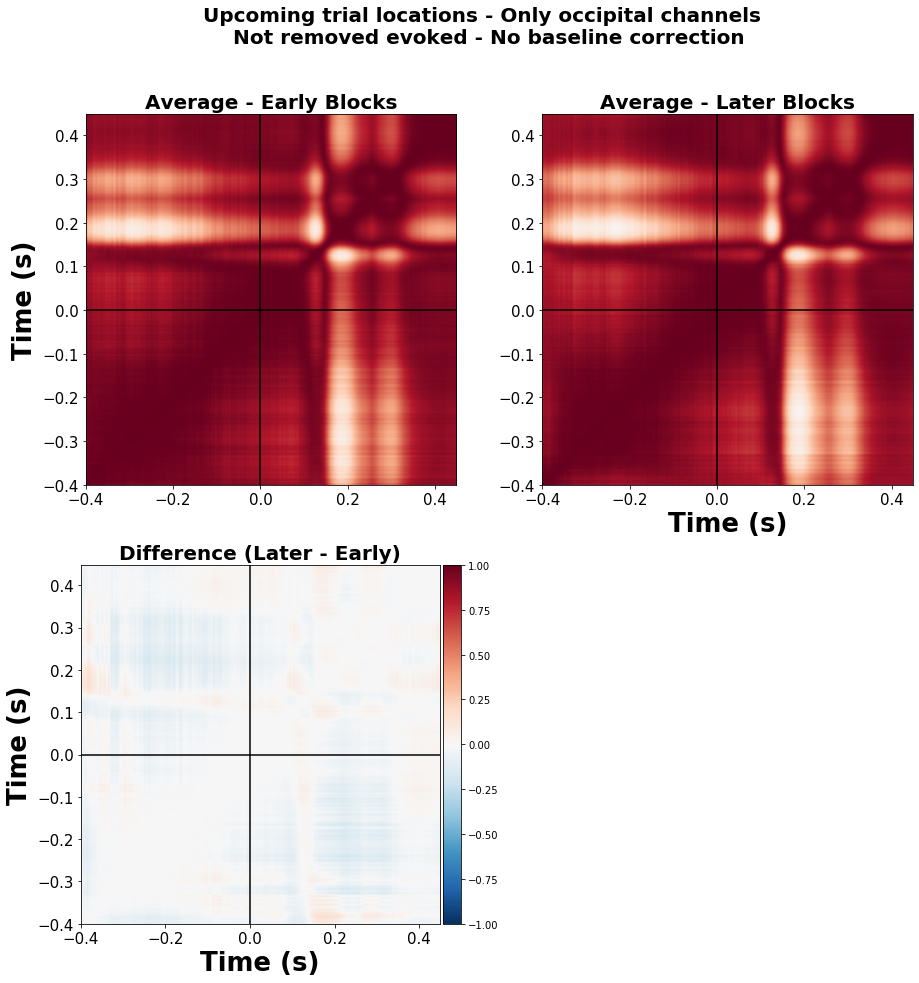

In [29]:
subj_p1 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 16, \
           43, 44, 45, 47, 48, 51, 52, \
           56, 57, 58, 59, 60, 61, 63, 64, \
           66, 67, 68, 69, 71, 72, 73]
subj_p2 = [18, 19, 20, 21, 23, 24, 26, 28, 29, 30, \
           31, 32, 33, 34, 35, 36, 38, 39]

# early ------------- #
# cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels)
args = arguments('early', 'none', 'False', 'Trgt_Loc_main', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_e_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p early all subjects:',act_e_occ.shape)

# late ------------- #
args = arguments('later', 'none', 'False', 'Trgt_Loc_main', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_l_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p later all subjects:',act_l_occ.shape)

# diff ------------- #
act_d_occ = act_l_occ.copy() - act_e_occ.copy()
print('p diff all subjects:',act_d_occ.shape)

evk_data_e_occ = np.mean(act_e_occ, axis=0)
evk_data_l_occ = np.mean(act_l_occ, axis=0)
evk_data_d_occ = np.mean(act_d_occ, axis=0)

diff_SxCxT = np.mean(act_d_occ.copy(), axis=1)
diff_SxTxC = diff_SxCxT.reshape(diff_SxCxT.shape[0], diff_SxCxT.shape[2], diff_SxCxT.shape[1])
diff_SxT = np.mean(diff_SxCxT.copy(), axis=1)
diff_T = np.mean(diff_SxT, axis=0)

num_tot_subjects = diff_SxCxT.shape[0]
#----------------------------------------------------------------------------------------------------------
from sklearn.metrics.pairwise import cosine_similarity
# avg = 

mapr_e = np.zeros((4, evk_data_e_occ.shape[2], evk_data_e_occ.shape[2]))
mapr_l = np.zeros((4, evk_data_l_occ.shape[2], evk_data_l_occ.shape[2]))

mapr_e[0,:,:] = cosine_similarity(X=evk_data_e_occ[0,:,:].copy().T, Y=None).T
mapr_e[1,:,:] = cosine_similarity(X=evk_data_e_occ[1,:,:].copy().T, Y=None).T
mapr_e[2,:,:] = cosine_similarity(X=evk_data_e_occ[2,:,:].copy().T, Y=None).T
mapr_e[3,:,:] = cosine_similarity(X=evk_data_e_occ[3,:,:].copy().T, Y=None).T

mapr_l[0,:,:] = cosine_similarity(X=evk_data_l_occ[0,:,:].copy().T, Y=None).T
mapr_l[1,:,:] = cosine_similarity(X=evk_data_l_occ[1,:,:].copy().T, Y=None).T
mapr_l[2,:,:] = cosine_similarity(X=evk_data_l_occ[2,:,:].copy().T, Y=None).T
mapr_l[3,:,:] = cosine_similarity(X=evk_data_l_occ[3,:,:].copy().T, Y=None).T

mapr_d = mapr_l - mapr_e
#----------------------------------------------------------------------------------------------------------
avgmap_e = mapr_e.copy()#np.mean(mapr_e, axis=0)
avgmap_l = mapr_l.copy()#np.mean(mapr_l, axis=0)
avgmap_d = mapr_d.copy()#np.mean(mapr_d, axis=0)
#----------------------------------------------------------------------------------------------------------
#  plot ------------- #
vmin=-1
vmax=1
title = 'Upcoming trial locations - Only occipital channels \n Not removed evoked - No baseline correction'
plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)


#----------------------------------------------------------------------------------------------------------
#  plot ------------- #
vmin=-1
vmax=1
title = 'Upcoming trial locations - Only occipital channels \n Not removed evoked - No baseline correction'
plot_autocorr_avgGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)

../../../results/temp_gen/blanca/
p1 subjects: (33, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p early all subjects: (51, 4, 44, 213)
../../../results/temp_gen/blanca/
p1 subjects: (33, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p later all subjects: (51, 4, 44, 213)
p diff all subjects: (51, 4, 44, 213)


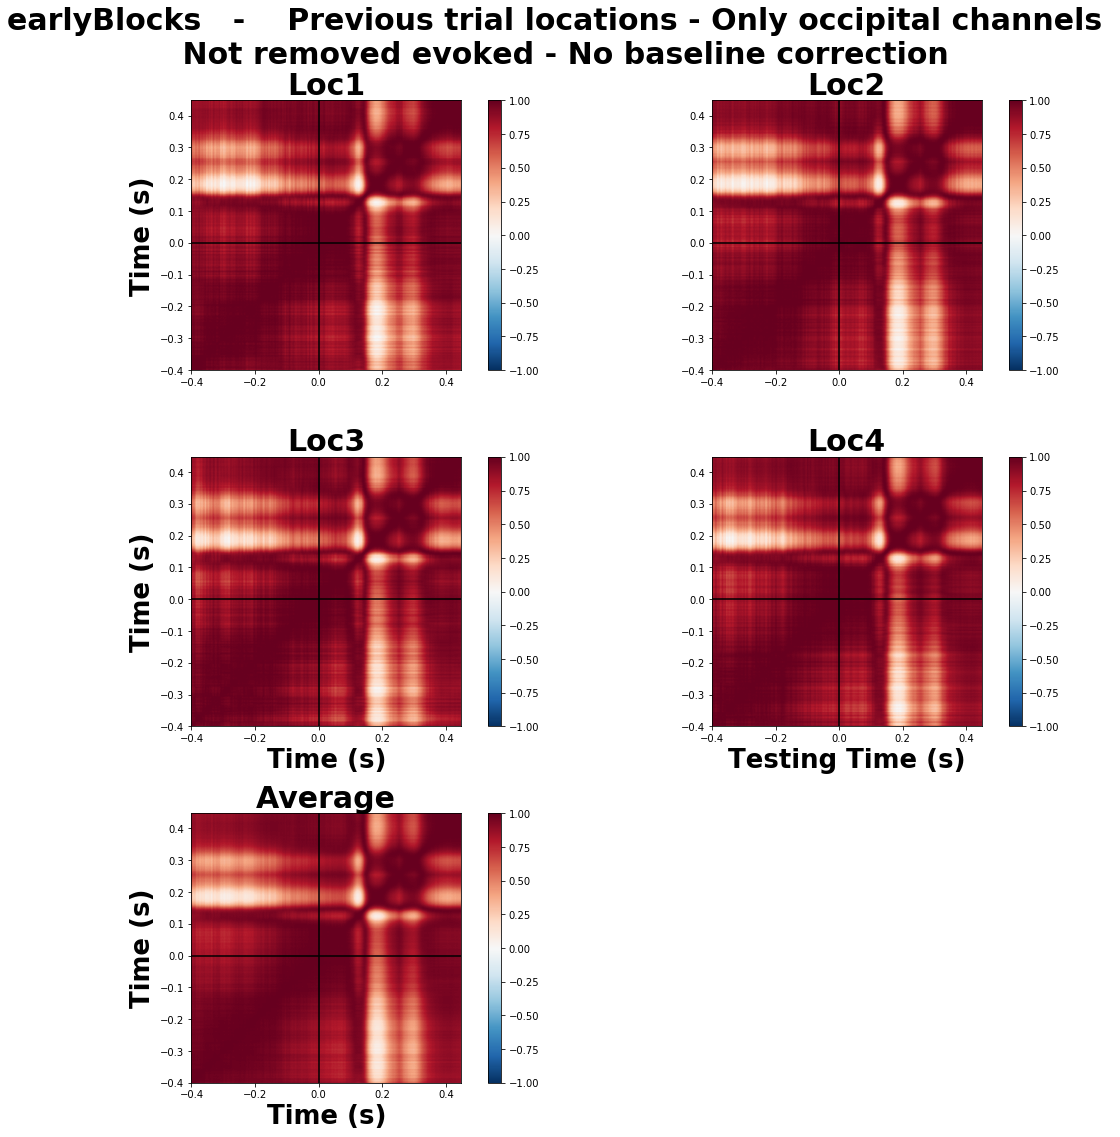

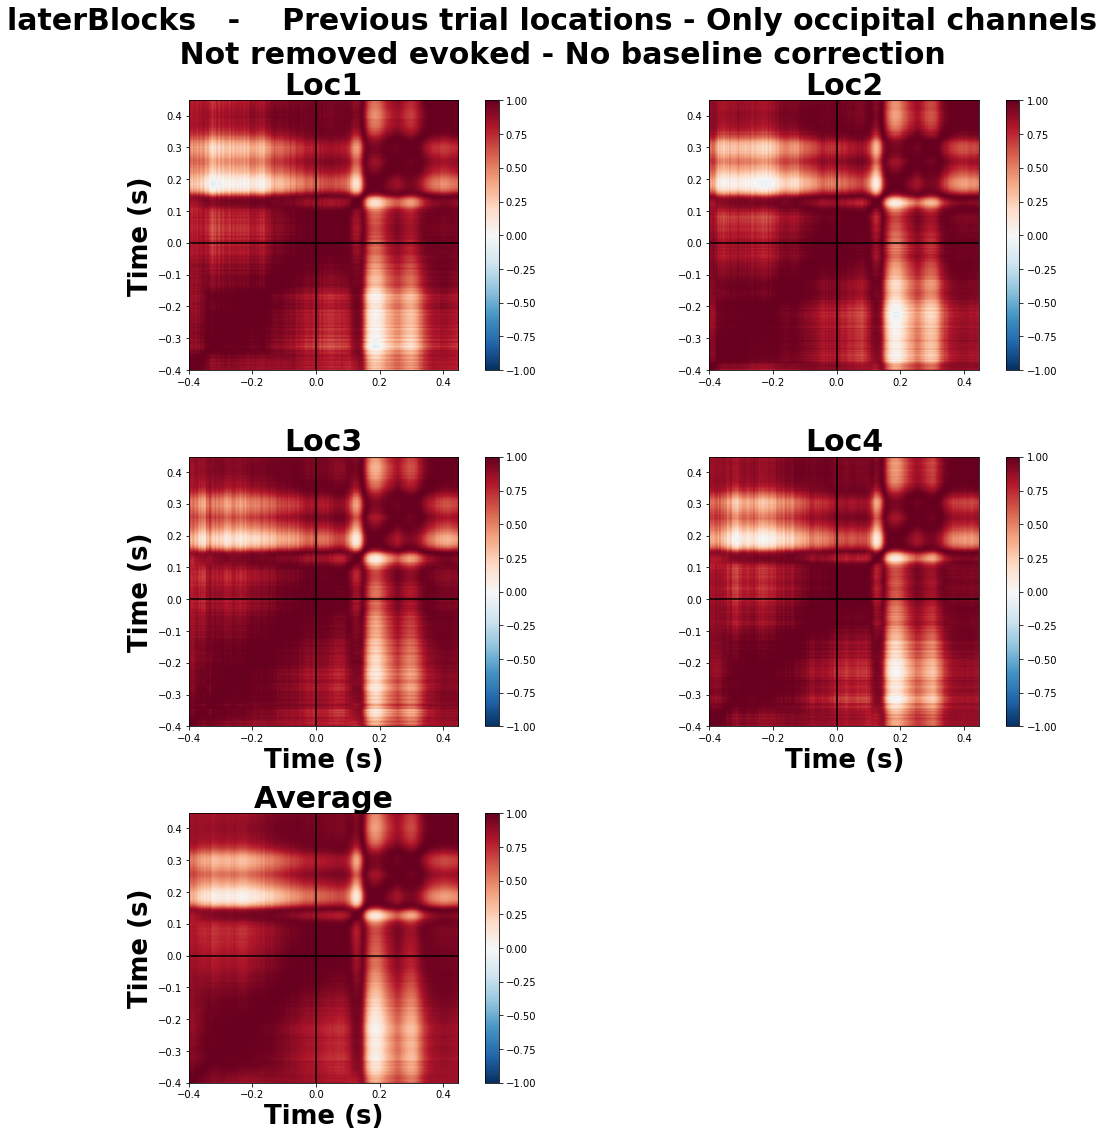

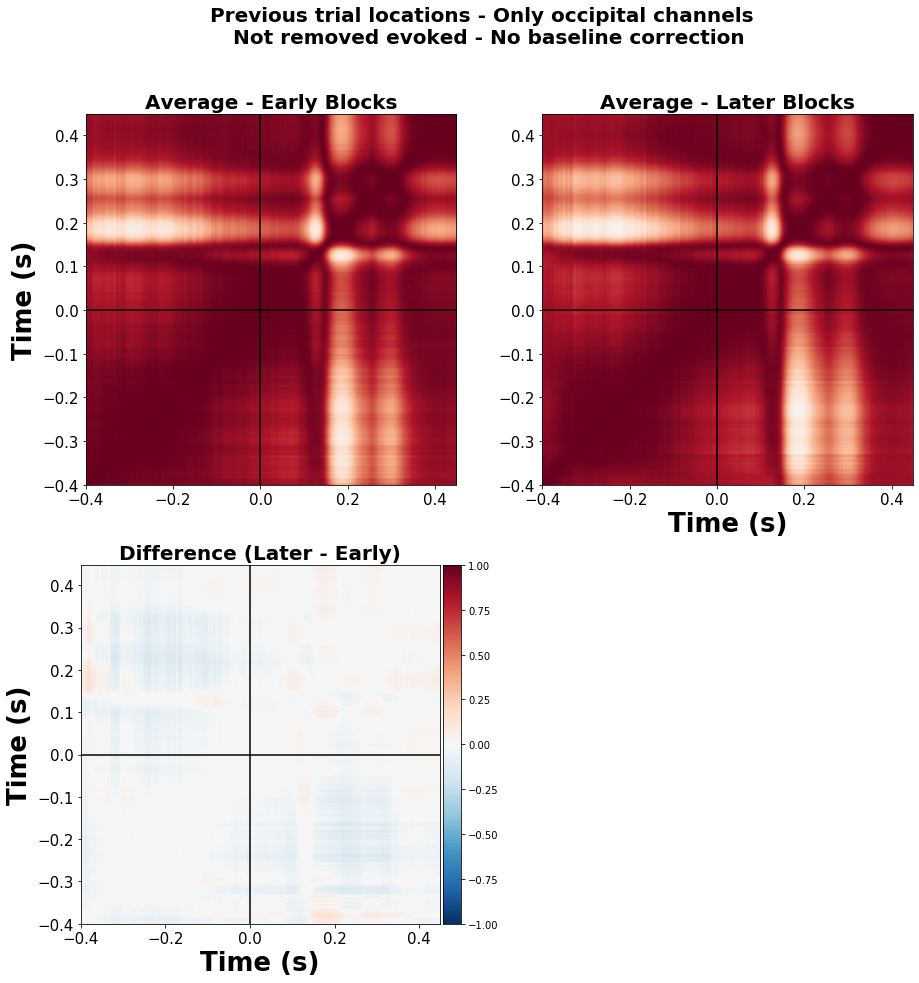

In [36]:
subj_p1 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 16, \
           43, 44, 45, 47, 48, 51, 52, \
           56, 57, 58, 59, 60, 61, 63, 64, \
           66, 67, 68, 69, 71, 72, 73]
subj_p2 = [18, 19, 20, 21, 23, 24, 26, 28, 29, 30, \
           31, 32, 33, 34, 35, 36, 38, 39]

# early ------------- #
# cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels)
args = arguments('early', 'none', 'False', 'Trgt_Loc_prev', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_e_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p early all subjects:',act_e_occ.shape)

# late ------------- #
args = arguments('later', 'none', 'False', 'Trgt_Loc_prev', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_l_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p later all subjects:',act_l_occ.shape)

# diff ------------- #
act_d_occ = act_l_occ.copy() - act_e_occ.copy()
print('p diff all subjects:',act_d_occ.shape)

evk_data_e_occ = np.mean(act_e_occ, axis=0)
evk_data_l_occ = np.mean(act_l_occ, axis=0)
evk_data_d_occ = np.mean(act_d_occ, axis=0)

diff_SxCxT = np.mean(act_d_occ.copy(), axis=1)
diff_SxTxC = diff_SxCxT.reshape(diff_SxCxT.shape[0], diff_SxCxT.shape[2], diff_SxCxT.shape[1])
diff_SxT = np.mean(diff_SxCxT.copy(), axis=1)
diff_T = np.mean(diff_SxT, axis=0)

num_tot_subjects = diff_SxCxT.shape[0]
#----------------------------------------------------------------------------------------------------------
from sklearn.metrics.pairwise import cosine_similarity
# avg = 

mapr_e = np.zeros((4, evk_data_e_occ.shape[2], evk_data_e_occ.shape[2]))
mapr_l = np.zeros((4, evk_data_l_occ.shape[2], evk_data_l_occ.shape[2]))

mapr_e[0,:,:] = cosine_similarity(X=evk_data_e_occ[0,:,:].copy().T, Y=None).T
mapr_e[1,:,:] = cosine_similarity(X=evk_data_e_occ[1,:,:].copy().T, Y=None).T
mapr_e[2,:,:] = cosine_similarity(X=evk_data_e_occ[2,:,:].copy().T, Y=None).T
mapr_e[3,:,:] = cosine_similarity(X=evk_data_e_occ[3,:,:].copy().T, Y=None).T

mapr_l[0,:,:] = cosine_similarity(X=evk_data_l_occ[0,:,:].copy().T, Y=None).T
mapr_l[1,:,:] = cosine_similarity(X=evk_data_l_occ[1,:,:].copy().T, Y=None).T
mapr_l[2,:,:] = cosine_similarity(X=evk_data_l_occ[2,:,:].copy().T, Y=None).T
mapr_l[3,:,:] = cosine_similarity(X=evk_data_l_occ[3,:,:].copy().T, Y=None).T

mapr_d = mapr_l - mapr_e
#----------------------------------------------------------------------------------------------------------
avgmap_e = mapr_e.copy()#np.mean(mapr_e, axis=0)
avgmap_l = mapr_l.copy()#np.mean(mapr_l, axis=0)
avgmap_d = mapr_d.copy()#np.mean(mapr_d, axis=0)
#----------------------------------------------------------------------------------------------------------
#  plot ------------- #
vmin=-1
vmax=1
title = 'Previous trial locations - Only occipital channels \n Not removed evoked - No baseline correction'
plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)


#----------------------------------------------------------------------------------------------------------
#  plot ------------- #
vmin=-1
vmax=1
title = 'Previous trial locations - Only occipital channels \n Not removed evoked - No baseline correction'
plot_autocorr_avgGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)

# statistics

In [14]:
print(title)
print(mapr_e.shape)
print(mapr_l.shape)
print(mapr_d.shape)

print('\n')
print(avgmap_d.shape)

print(act_d_occ.shape)
print(evk_data_d_occ.shape)
# evk_data_e_occ = np.mean(act_e_occ, axis=0)
# evk_data_l_occ = np.mean(act_l_occ, axis=0)
# evk_data_d_occ = np.mean(act_d_occ, axis=0)



# avgmap_e = mapr_e.copy()#np.mean(mapr_e, axis=0)
# avgmap_l = mapr_l.copy()#np.mean(mapr_l, axis=0)
# avgmap_d = mapr_d.copy()#np.mean(mapr_d, axis=0)

Upcoming trial locations - Only occipital channels 
 Removed evoked - No baseline correction
(4, 213, 213)
(4, 213, 213)
(4, 213, 213)


(4, 213, 213)
(51, 4, 44, 213)
(4, 44, 213)


In [16]:
subj_p1 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 16, \
           43, 44, 45, 47, 48, 51, 52, \
           56, 57, 58, 59, 60, 61, 63, 64, \
           66, 67, 68, 69, 71, 72, 73]
subj_p2 = [18, 19, 20, 21, 23, 24, 26, 28, 29, 30, \
           31, 32, 33, 34, 35, 36, 38, 39]

# early ------------- #
# cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels)
args = arguments('early', 'removeevoked', 'False', 'Trgt_Loc_prev', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_e_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p early all subjects:',act_e_occ.shape)

# late ------------- #
args = arguments('later', 'removeevoked', 'False', 'Trgt_Loc_prev', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_l_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p later all subjects:',act_l_occ.shape)

# diff ------------- #
act_d_occ = act_l_occ.copy() - act_e_occ.copy()
print('p diff all subjects:',act_d_occ.shape)

evk_data_e_occ = np.mean(act_e_occ, axis=0)
evk_data_l_occ = np.mean(act_l_occ, axis=0)
evk_data_d_occ = np.mean(act_d_occ, axis=0)

diff_SxCxT = np.mean(act_d_occ.copy(), axis=1)
diff_SxTxC = diff_SxCxT.reshape(diff_SxCxT.shape[0], diff_SxCxT.shape[2], diff_SxCxT.shape[1])
diff_SxT = np.mean(diff_SxCxT.copy(), axis=1)
diff_T = np.mean(diff_SxT, axis=0)

../../../results/temp_gen/blanca/
p1 subjects: (33, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p early all subjects: (51, 4, 44, 213)
../../../results/temp_gen/blanca/
p1 subjects: (33, 4, 44, 213)
p2 subjects (18, 4, 44, 213)
p later all subjects: (51, 4, 44, 213)
p diff all subjects: (51, 4, 44, 213)


In [18]:
num_tot_subjects = diff_SxCxT.shape[0]
#----------------------------------------------------------------------------------------------------------
from sklearn.metrics.pairwise import cosine_similarity
mapr_e_subjs = np.zeros([num_tot_subjects, act_d_occ.shape[3], act_d_occ.shape[3]]) # SubjXTimeXTime
avg_SxCxT = np.mean(act_d_occ, axis=1)
print('avg_SxCxT shape is', avg_SxCxT.shape)
for s in range(num_tot_subjects):
    mapr_e_subjs[s,:,:] = cosine_similarity(X=avg_SxCxT[s,:,:].copy().T, Y=None).T
print('mapr_e_subjs shape': mapr_e_subjs.shape

avg_SxCxT shape is (51, 44, 213)
